## LAB 3 tree-based classification 

### Adult-Income Dataset
[source] https://raw.githubusercontent.com/saravrajavelu/Adult-Income-Analysis/master/adult.csv :
Predict whether income exceeds $50K/yr based on census data

**Attribute information**
1.   age: continuous.
2.   workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.List item
3.  fnlwgt: continuous.
4.  education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
5.  education-num: continuous.
6.  marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
7.  occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
10. sex: Female, Male.
11. capital-gain: continuous.
12. capital-loss: continuous.
13. hours-per-week: continuous.
14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

**The outcome (Label)**
15. Income: >50K, <=50K

## อ่านชุดข้อมูล Adult Income

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/saravrajavelu/Adult-Income-Analysis/master/adult.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## ข้อ 1 จงวิเคราะห์ข้อมูลด้วย pandas เพื่อตอบคำถามข้อ 1.1 ถึง 1.6

In [23]:
## 1.1  df['income'].value_counts()
## 1.2  df.select_dtypes(include='object').columns.tolist()
## 1.3  df['age'].mean()
## 1.4  male_over40 = df[(df['gender'] == 'Male') & (df['age'] > 40) & (df['marital-status'] == 'Never-married') &
##    (df['income'] == '>50K')].shape[0]
## 1.5 most_common_hours = df['hours-per-week'].mode().values[0]
## 1.6 df.columns[df.isin(['?']).any()].tolist()


## ข้อ 2. เขียนฟังก์ชั่นจัดการ missing values ในชุดข้อมูลนี้

In [ ]:
def fill_missing(df):
    df_filled = df.replace('?', pd.NA)
    miss_features = df.columns[df.isin(['?']).any()].tolist()
    for column in miss_features:
        if df_filled[column].isna().any():
            mode_value = df_filled[column].mode()[0]
            df_filled[column] = df_filled[column].fillna(mode_value)
    return df_filled

dfx = fill_missing(df)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## ข้อ 3. แปลง categorical features ให้อยู่ในรูปของ binary features 

In [ ]:
df2 = pd.get_dummies(df)
df2

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,25,226802,7,0,0,40,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,38,89814,9,0,0,50,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,28,336951,12,0,0,40,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
3,44,160323,10,7688,0,40,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
4,18,103497,10,0,0,30,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
48838,40,154374,9,0,0,40,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
48839,58,151910,9,0,0,40,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
48840,22,201490,9,0,0,20,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False


## ข้อ 4. แบ่งชุดข้อมูลดังกล่าวออกเป็น  80% และ 20% สำหรับฝึก (train) และทดสอบ (test) 

In [27]:
from sklearn.model_selection import train_test_split

Y = df2['income_>50K'].values
X = df2.drop(columns=['income_>50K', 'income_<=50K'])

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)
print(X_train.shape)

(39073, 108)


## 5. สร้างโมเดล Decision tree โดยใช้ชุดข้อมูล train กำหนดให้ใช้ entropy เป็น split criterion และความลึกสูงสุดของต้นไม้ไม่เกิน 2 ระดับ (level) 

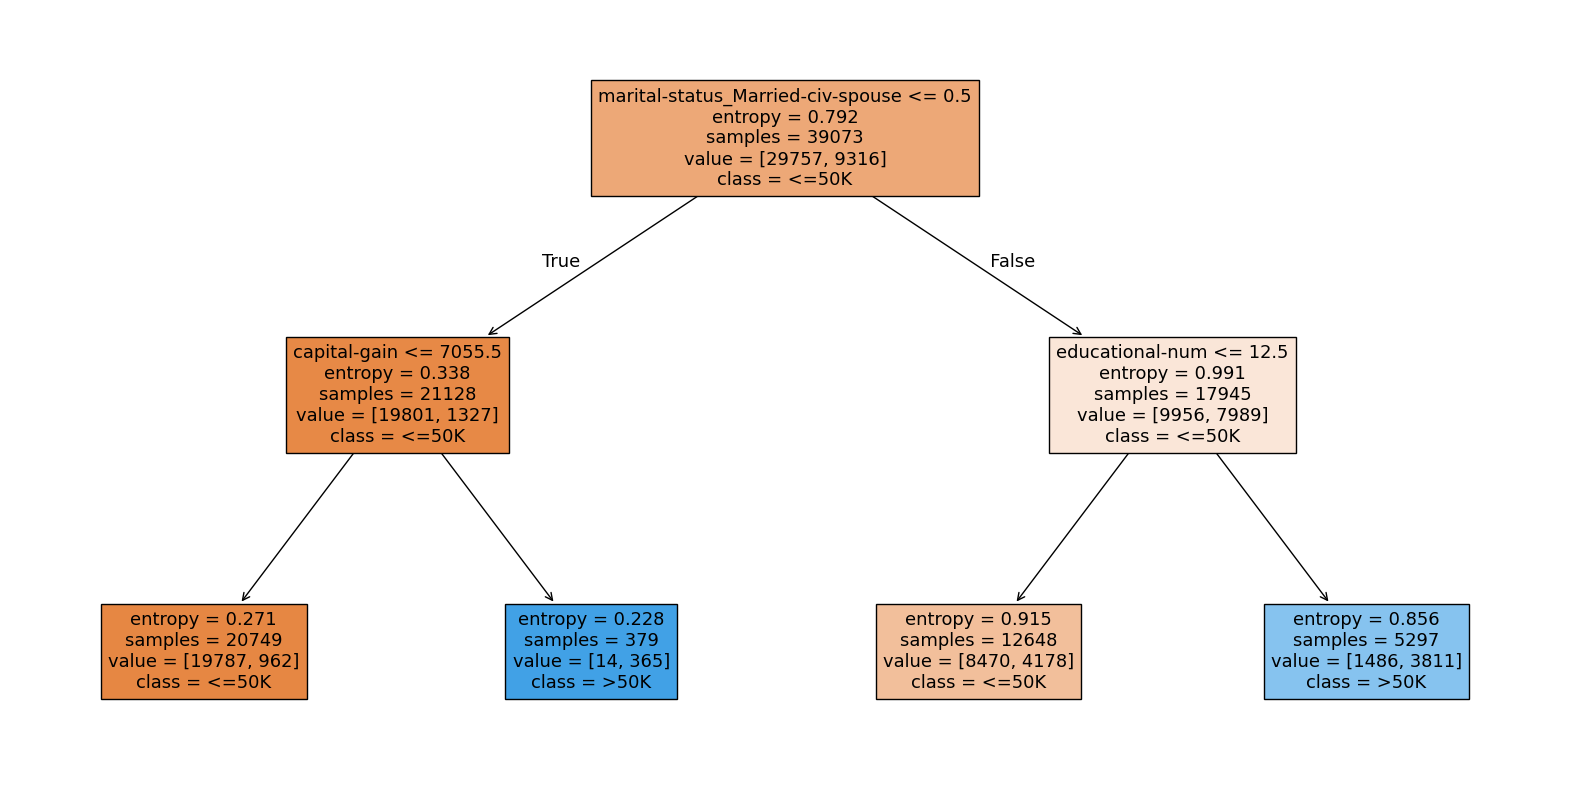

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dt = DecisionTreeClassifier(criterion='entropy', max_depth= 2)
dt.fit(X_train, Y_train)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(dt, filled=True, feature_names = X.columns, class_names = ['<=50K', '>50K'])
plt.show()

## ข้อ 6. ความแม่นยำ (accuracy) ของโมเดล decision tree บนชุดข้อมูลทดสอบ 

In [30]:
result = dt.score(X_test, Y_test)
print('accuracy of the decision tree model : {:.2f} %'.format(result*100.00))

accuracy of the decision tree model : 82.50 %


### ข้อ 7. สร้างโมเดล random forest โดยกำหนดความลึกสูงสุดของต้นไม้เท่ากับ 3 ขณะที่จำนวนต้นไม้ย่อย (n_estimator) ใช้ GridSearchCV ค้นหาค่าที่ดีที่สุดบนชุดข้อมูล train กำหนดช่วงค่าอยู่ระหว่าง 6 ถึง 10

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': range(6, 10)}
clf = GridSearchCV(RandomForestClassifier(max_depth = 3), parameters)
clf.fit(X_train, Y_train)

best_rf = clf.best_estimator_
best_rf

,n_estimators,6
,criterion,'gini'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### 8.	แสดงต้นไม้ random forest ที่สร้างได้ 6 ต้นแรก   

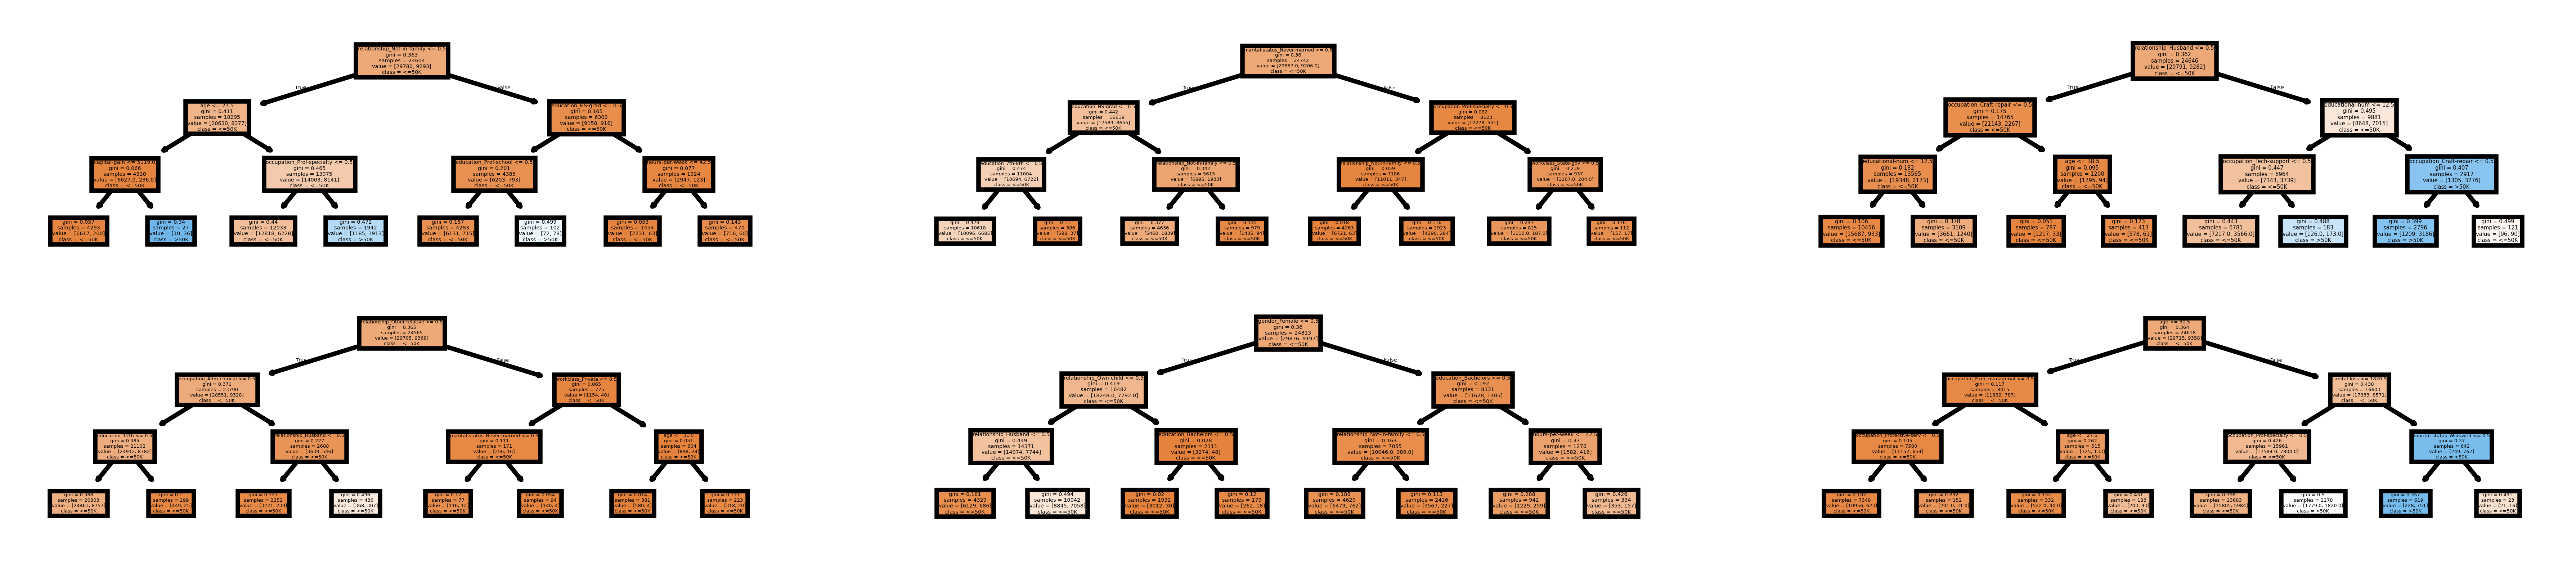

In [43]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 2), dpi=900)
for index in range(6):
    plot_tree(best_rf.estimators_[index], filled=True, feature_names = X.columns, class_names = ['<=50K', '>50K'],
                   ax = axes.ravel()[index])

## 9.	ความแม่นยำ (accuracy) ของโมเดล random forest บนชุดข้อมูลทดสอบ 

In [44]:
result = best_rf.score(X_test, Y_test)
print('accuracy of the random forest model : {:.2f} %'.format(result*100.00))

accuracy of the random forest model : 76.12 %


## ข้อ 10. ปรับปรุงโมเดล random forest จากข้อ 7 โดยใช้อัลกอริทึม XgBoost พร้อมแสดงค่าความแม่นยำบนชุดข้อมูลทดสอบ (test data) 

In [49]:
from xgboost import XGBClassifier

clf_xgb = XGBClassifier(max_depth=3, n_estimators=6)
clf_xgb.fit(X_train, Y_train)

result = clf_xgb.score(X_test, Y_test)
print('accuracy of the xgboost model : {:.2f} %'.format(result*100.00))

accuracy of the xgboost model : 84.57 %


## ข้อ 11. ทดลองใช้ GridSearchCV เพื่อหาจำนวนต้นไม้ย่อยใน XgBoost ที่ให้ผลลัพธ์สูงที่สุด จากการกำหนดค่าความลึกตั้งแต่ 2 ถึง 4 ระดับ และจำนวนต้นไม้ย่อยตั้งแต่  1 ถึง 20 ต้น 

In [51]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': range(1, 20), 
              'max_depth': range(2,4) }
clf = GridSearchCV(XGBClassifier(max_depth=3), parameters)
clf.fit(X_train, Y_train)

best_xgb = clf.best_estimator_

result = best_xgb.score(X_test, Y_test)
print('accuracy of the xgboost model : {:.2f} %'.format(result*100.00))


accuracy of the xgboost model : 85.25 %


## ข้อ 12.	บันทึกโมเดล XGboost ในรูปแบบของไฟล์ pickle ตั้งชื่อ XgB.pkl.

In [52]:
import pickle

pickle.dump(clf_xgb, open('xgb.pkl', 'wb'))